<center><img src = "Images/ATU_Logo.jpg"></center>

<h2 style="color: #001a79;">Author: Sam Tracey</h2>
<h2 style="color: #001a79;">Module: Machine Learning and Statistics</h2>
<h2 style="color: #001a79;">Topic 1. Statistics.</h2>

<hr style="border-top: 1px solid #001a79;" />



<h2 style="color: rgb(0, 91, 94);">Lady Tasting Tea</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" style="border: 1px solid #ff791e" width="200px">

The Lady Tasting Tea problem was first described by <a href="http://www-history.mcs.st-andrews.ac.uk/Biographies/Fisher.html" style="color: #ff791e">Ronald A. Fisher</a> in his book The Design of Experiments.

He described the problem as follows.

> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.

> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

<h2 style="color: rgb(0, 91, 94);">Hypotheses</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In the book, Fisher describes the *null hypothesis*.

It is the statement to be countered by the experiment.

In this case it is the hypothesis that the subject cannot tell the difference between a cup of tea that had milk in it first and one that had the tea in it first.

<br>

**Null Hypothesis:** the subject can not tell if the cup had milk in it first or last.

<br>

Once we collect the experimental data we evaluate how likely we were to see such data if the null hypothesis is true.

If it is very unlikely, then we may reject the null hypothesis.

Typically we have an alternative hypothesis that we suggest rejecting the null hypothesis is evidence for.

<br>

**Alternative Hypothesis:** the subject can tell.

<br>

Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing.

Fisher considered that unlikely enough to reject the null hypothesis if they manage it.

In [1]:
# Only one of the 70 randomly selected possibilities is the desired result.
1 / 70

0.014285714285714285

<h3 style="color: #001a79;">Exercise 1.1</h3>

<hr style="border-top: 1px solid #001a79;" />

The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.



In [2]:
# The following code is adapted from this StackOverflow link: https://stackoverflow.com/a/4941932

In [3]:
# Importing Necessary Modules
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Nicer colours and styles for plots.
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 80

We know from our previous work that selecting four cups correctly from 8 cups in total has a probability of 0.0143 (1.43%)

In [4]:
# Number of ways of selecting 4 cups from 8.
1.0 / math.comb(8, 4)

0.014285714285714285

We can use a simple nested for loop in conjunction with the <code>math.comb</code> function to calculate the probabilities for a range of scenarios. In this example I have limited the range of "cups" between 1 and 12 as we are only interested in finding the *minimum* number of cups required to deliver a probability of < 1%.

In [5]:
# Initialize a new list and use a nested for loop to calculate probabilities for each combination.
# Only return probabilities < 0.01.
rows = []
for i in range(1, 12):
    for j in range (1, 12):
        if j <= i:
            prob = (1.0 / math.comb(i, j))
            if prob <= 0.01:
                print(f'Probability of selecting {j} cups from {i} is {prob}')
                rows.append([j, i, prob])

Probability of selecting 4 cups from 9 is 0.007936507936507936
Probability of selecting 5 cups from 9 is 0.007936507936507936
Probability of selecting 3 cups from 10 is 0.008333333333333333
Probability of selecting 4 cups from 10 is 0.004761904761904762
Probability of selecting 5 cups from 10 is 0.003968253968253968
Probability of selecting 6 cups from 10 is 0.004761904761904762
Probability of selecting 7 cups from 10 is 0.008333333333333333
Probability of selecting 3 cups from 11 is 0.006060606060606061
Probability of selecting 4 cups from 11 is 0.0030303030303030303
Probability of selecting 5 cups from 11 is 0.0021645021645021645
Probability of selecting 6 cups from 11 is 0.0021645021645021645
Probability of selecting 7 cups from 11 is 0.0030303030303030303
Probability of selecting 8 cups from 11 is 0.006060606060606061


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">1.1 Answer</p>

As we can see, the actual minimum number of cups required to return a probability of < 1% (0.01) is 9 cups in total.

</div>




*Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

This answer is based on the discussion of Fisher's Lady Tasting Tea Experiment at: https://www.stat.berkeley.edu/~stark/Teach/S240/Notes/ch3.htm<br>
> A test that rejects the null hypothesis only when she matches all 8 cups has significance level 1/70 = 1.4%. If she misses one cup, she must in fact miss at least two, because she will have mislabeled a milk-first as tea-first, and vice versa. The possible numbers of "hits" are 0, 2, 4, 6, and 8. To get 6 hits, she must label as milk-first three of the four true milk-first cups, and must mislabel as milk-first one of the four tea-first cups. The number of arrangements that give exactly 6 hits is thus

> 4C3×4C1 = 16.

In [6]:
# The probability of the lady getting 3 correct guesses and 1 correct from 8 cups is 6.25%:
1 / (math.comb(4, 3) * math.comb(4, 1))

0.0625

In [7]:
# Create a for loop to calculate probabilities when one cup is identified incorrectly.
rows = []
for i in range(1, 20):
    prob = (1.0 / (math.comb(i, i-1) * math.comb(i, 1)))
    if prob <= 0.01:
        print(f'Cups with milk first: {i}. Correct Cups identified: {i-1}. Probability: {prob}')
                

Cups with milk first: 10. Correct Cups identified: 9. Probability: 0.01
Cups with milk first: 11. Correct Cups identified: 10. Probability: 0.008264462809917356
Cups with milk first: 12. Correct Cups identified: 11. Probability: 0.006944444444444444
Cups with milk first: 13. Correct Cups identified: 12. Probability: 0.005917159763313609
Cups with milk first: 14. Correct Cups identified: 13. Probability: 0.00510204081632653
Cups with milk first: 15. Correct Cups identified: 14. Probability: 0.0044444444444444444
Cups with milk first: 16. Correct Cups identified: 15. Probability: 0.00390625
Cups with milk first: 17. Correct Cups identified: 16. Probability: 0.0034602076124567475
Cups with milk first: 18. Correct Cups identified: 17. Probability: 0.0030864197530864196
Cups with milk first: 19. Correct Cups identified: 18. Probability: 0.002770083102493075


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">1.1 Bonus Answer</p>

To maintain the 1% threshold the experiment would require 20 cups. From the 10 cups with milk added first, the lady would be able to incorrectly label one of them.

</div>




<h3 style="color: #001a79;">Exercise 1.2</h3>

<hr style="border-top: 1px solid #001a79;" />


Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

In [8]:
# Statistical methods
import scipy.stats as ss

We can visualise the contingency table as follows:



|    | Tea | Milk |
|----|-----|------|
|**Tea** | 4   | 0    |
|**Milk**| 0   | 4    |



In [9]:
# Create a table based on contingency table above.
results = ([[4,0], [0,4]])

In [10]:
# Perform Fisher's Exact Test.
oddsratio, pvalue = ss.fisher_exact(results)
pvalue

0.028571428571428536

***
<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Why is our probability exactly double?</p>

You can see when we run the <code>Fisher_exact</code> test as shown in the Scipy documentation we generate a p-value exactly double what we have calculated previously.<br>
Remember the probability of guessing the correct four cups of tea from a set of eight is 1/70 or 0.0142857.<br>
When we run the <code>Fisher_exact</code> without specifying an alternate hypothesis, Scipy defaults to a "two-sided" test.<br>
<br>
**Why is this an issue?**<br>
<br>
From the Scipy documentation:
> *The two-sided p-value is the probability that, under the null hypothesis,<br>
a random table would have a probability equal to or less than the probability of the input table.*<br>
<br>

However, as we are about to show, there are actually two possible combinations where the probability of attaining either one is less than or equal to the probability of the input table: [4, 0], [0, 4].

</div>

In [11]:
# Calculate the probability of each possible table in a set of 2 x 2 tables.
# Blatantly stolen from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html
from scipy.stats import hypergeom
import numpy as np
table = np.array([[4, 0], [0, 4]])
M = table.sum()
n = table[0].sum()
N = table[:, 0].sum()
start, end = hypergeom.support(M, n, N)

In [12]:
# Import pandas for data manipulation & analysis.
import pandas as pd

In [13]:
# Assign probabilities to array titled probs.
probs = (hypergeom.pmf(np.arange(start, end+1), M, n, N))

In [14]:
# Create dataframe using results array and add column headers.
prob_df = pd.DataFrame([(i, j) for i, j in enumerate(probs)], columns=['Correct', 'Probability'])

In [15]:
# Loop over the number of correct cases (0-4) and the results array:
for i, j in zip(range(0, 5), probs):
    # Print out the probabilities for each result:
    print(f'The probability of the lady getting {i} out of 4 cups correct is {j}')

The probability of the lady getting 0 out of 4 cups correct is 0.014285714285714268
The probability of the lady getting 1 out of 4 cups correct is 0.22857142857142837
The probability of the lady getting 2 out of 4 cups correct is 0.5142857142857145
The probability of the lady getting 3 out of 4 cups correct is 0.22857142857142837
The probability of the lady getting 4 out of 4 cups correct is 0.014285714285714268


In [42]:
prob_df

,Correct,Probability
0,0,0.014286
1,1,0.228571
2,2,0.514286
3,3,0.228571
4,4,0.014286


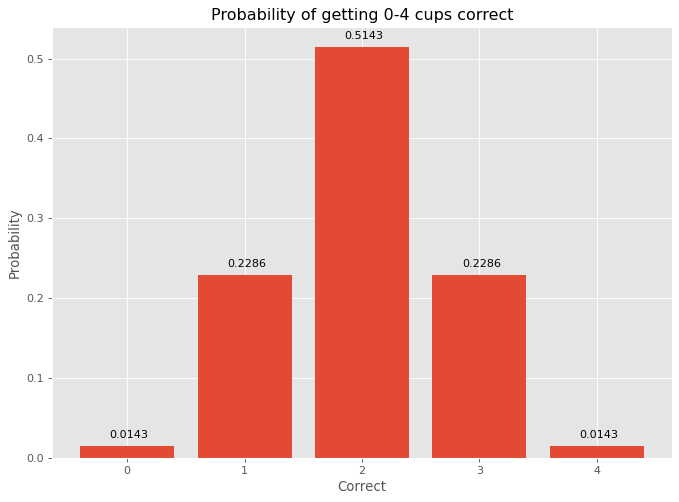

In [54]:
# Extract the Correct and Probability columns from the dataframe
correct = prob_df['Correct']
probability = prob_df['Probability']

# Set the x-axis values to be the Correct column
x_axis = correct

# Set the y-axis values to be the Probability column
y_axis = probability

# Set the labels for the x-axis
plt.xticks(x_axis)

# Plot the bar chart
plt.bar(x_axis, y_axis)

# Add labels to the y-axis
for a,b in zip(x_axis, y_axis):
    # Center the text on the bar
    plt.text(a-0.15, b+0.01, str(round(b, 4)))

# Add a title to the plot
plt.title('Probability of getting 0-4 cups correct')

# Add a label to the y-axis
plt.ylabel('Probability')

# Add a label to the x-axis
plt.xlabel('Correct')

# Show the plot
plt.show()

***
<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Why is our probability exactly double?</p>

As you can see from above, the probability of guessing the four correct cups from eight possible options has the exact same probability as guessing 0 of the correct cups from the eight possible options.<br>
This is the reason that the two-sided test has generated a probability exactly double what we had calculated initially.<br>
<br>
To rectify this, we should stipulate the alternate hypothesis in our <code>Fisher_exact</code> as "greater"

</div>

In [18]:
# Perform Fisher's Exact Test.
oddsratio, pvalue = ss.fisher_exact(results, alternative='greater')
print(f'The probability of correctly identifying the 4 cups where milk was added first is {pvalue}')

The probability of correctly identifying the 4 cups where milk was added first is 0.014285714285714268


<h3 style="color: #001a79;">Exercise 1.3</h3>

<hr style="border-top: 1px solid #001a79;" />


Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

***
The first thing we do is to import all the statistics functions from the sub-package <code>stats</code> of the <code>scipy</code> library.<br>
We then initialize a Random Generator using <code>numpy</code> and assign it to the variable rng.<br>
Numpy's random generator allows us to generate random numbers via many different methods.<br>
Interestingly in the "t-Test Theory and Simulating Errors" video we were told that replicating and running the example code from <code>scipy.stats.ttest_ind</code> would produce identical output. However this is not the case as the random generator is not seeded. In our working example below I have seeded the <code>np.random.default_rng()</code> by passing a value. Seeding ensures that we will produce repeatable results each time the notebook is run. 


In [19]:
from scipy import stats
rng = np.random.default_rng(5)

Next, we declare two different variables: rvs1 and rvs2.<br>
rvs1 and rvs2 are arrays which contain random samples from the normal distribution with equal means (5) and equal standard deviations (10). The sample size for both distributions is 500.<br>
For both arrays we specify that we are using the <code>numpy.random.default_rng()</code> seeded generator.

In [20]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

***
Reviewing the two distributions we see that they are similar (but not identical) in mean and standard deviation.

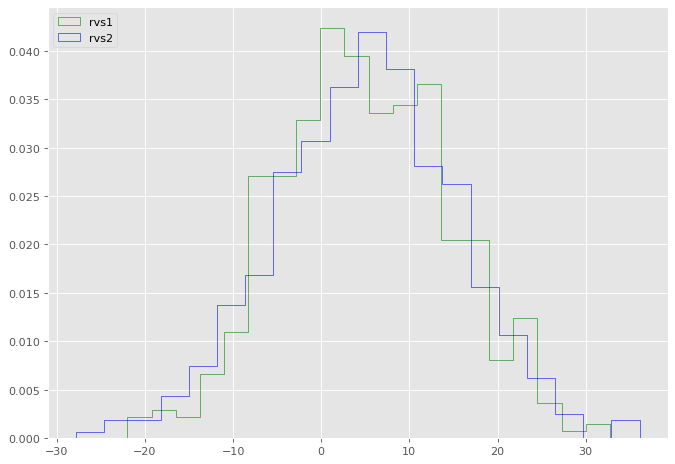

In [21]:
# Review Distributions of rvs1 and rvs2 in plot form
kwargs = dict(bins=20, density=True, stacked=True)
plt.hist(rvs1, **kwargs, color='g', label='rvs1', histtype='step')
plt.hist(rvs2, **kwargs, color='b', label='rvs2', histtype='step')
plt.legend()
plt.show()

***
Indeed we can directly calculate the mean and standard deviation for both rvs1 and rvs2 using <code>numpy</code>

In [22]:
rvs1_mean, rvs1_std = np.mean(rvs1), np.std(rvs1)
rvs2_mean, rvs2_std = np.mean(rvs2), np.std(rvs2)

print(f'Mean of rvs1 = {rvs1_mean}. Standard Deviation of rvs1 = {rvs1_std}')
print(f'Mean of rvs2 = {rvs2_mean}. Standard Deviation of rvs2 = {rvs2_std}')

Mean of rvs1 = 5.01306523542458. Standard Deviation of rvs1 = 9.588925933469392
Mean of rvs2 = 5.024211696573093. Standard Deviation of rvs2 = 10.275936690719533


***
Now we are going to calculate the T-test for the means of our two independent samples (rvs1 and rvs2.)<br>
In our first test we use the default value for equal_var which means we are assuming equal population variances.<br>
In the second test we stipulate <code>equal_var=False</code> which assumes unequal population variances.<br>
When we assume that the population variances are **not** equal, a Welch's t-test is perfromed instead of a Student's t-test.<br>
Wikipedia states:
>Welch's t-test is more robust than Student's t-test and maintains type I error rates close to nominal for unequal variances and for unequal sample sizes under normality. Furthermore, the power of Welch's t-test comes close to that of Student's t-test, even when the population variances are equal and sample sizes are balanced.[2] Welch's t-test can be generalized to more than 2-samples,[7] which is more robust than one-way analysis of variance (ANOVA).

>It is not recommended to pre-test for equal variances and then choose between Student's t-test or Welch's t-test.[8] Rather, Welch's t-test can be applied directly and without any substantial disadvantages to Student's t-test as noted above. Welch's t-test remains robust for skewed distributions and large sample sizes.[9] Reliability decreases for skewed distributions and smaller samples, where one could possibly perform Welch's t-test.[10] <br>

Indeed, when we compare the results obtained from the Student's t-test and the Welch's t-test we can see that the values for the t-statistic and p-value are almost identical when the sample mean and standard deviation are similar.


In [23]:
t_ss_equal, p_ss_equal = stats.ttest_ind(rvs1, rvs2)
t_ss_unequal, p_ss_unequal = stats.ttest_ind(rvs1, rvs2, equal_var=False)
print(f't-statistic using equal variances = {t_ss_equal}. t-statistic using unequal variances = {t_ss_unequal}')
print(f'p-value using equal variances = {p_ss_equal}. p-value using unequal variances = {p_ss_unequal}')

t-statistic using equal variances = -0.017715652120147647. t-statistic using unequal variances = -0.017715652120147644
p-value using equal variances = 0.985869234975588. p-value using unequal variances = 0.9858692518738941


***
Next we are going to evaluate the Student's t-test and Welch's t-test when we have a sample distribution with different standard deviation.<br>
We create a new array with mean = 5 and standard deviation = 20 and perform both tests.

In [24]:
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)

***
Let's review the distributions of both rvs1 (mean = 5, standard deviation = 10) and rvs3 (mean = 5 and standard deviation = 10).
We can clearly see the larger standard deviation that rvs3 has (wider distribution).

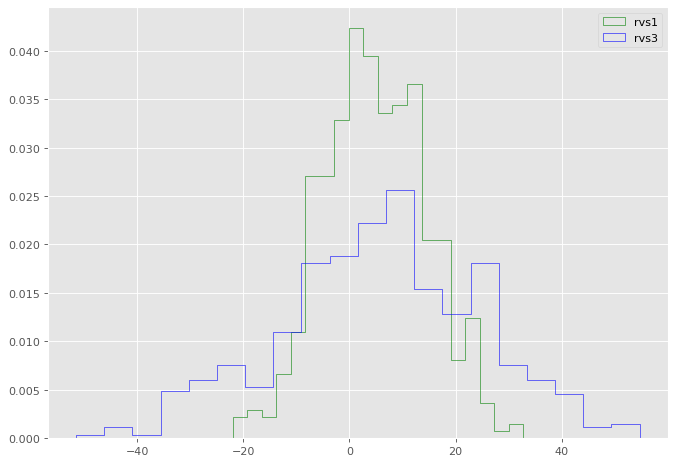

In [25]:
# Review Distributions of rvs1 and rvs3 in plot form
plt.hist(rvs1, **kwargs, color='g', label='rvs1', histtype='step')
plt.hist(rvs3, **kwargs, color='b', label='rvs3', histtype='step')
plt.legend()
plt.show()

***
Again we call the <code>stats.ttest_ind</code> test using both the Student's t-test and Welch's t-test.<br>
This time we can see that there is a slightly greater difference in the p-values calculated with the Student's t-test underestimating the p-value.<br>
The t-statistic remains the same using either test.

In [26]:
t_ss_equal, p_ss_equal = stats.ttest_ind(rvs1, rvs3)
t_ss_unequal, p_ss_unequal = stats.ttest_ind(rvs1, rvs3, equal_var=False)
print(f't-statistic using equal variances = {t_ss_equal}. t-statistic using unequal variances = {t_ss_unequal}')
print(f'p-value using equal variances = {p_ss_equal}. p-value using unequal variances = {p_ss_unequal}')

t-statistic using equal variances = -1.124002966660949. t-statistic using unequal variances = -1.124002966660949
p-value using equal variances = 0.2612820506950921. p-value using unequal variances = 0.2613752873676511


***
What if we have have different sample sizes?<br>
We create a new array with the same mean (5), larger standard deviation (20) and smaller sample size (100) and compare the distributions of rvs1 and rvs4.<br>


In [27]:
rvs4 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)

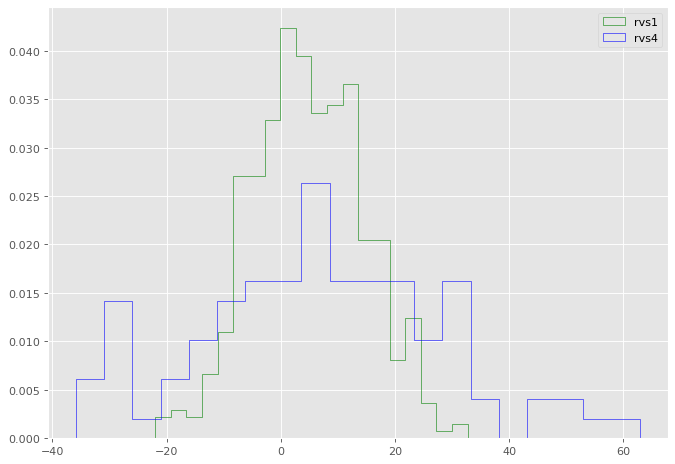

In [28]:
# Review Distributions of rvs1 and rvs4 in plot form
plt.hist(rvs1, **kwargs, color='g', label='rvs1', histtype='step')
plt.hist(rvs4, **kwargs, color='b', label='rvs4', histtype='step')
plt.legend()
plt.show()

***
Then we call the <code>stats.ttest_ind</code> test using both the Student's t-test and Welch's t-test.<br>
Again we see that the p-value is underestimated using the Student's t-test compared to the Welch's t-test but, this time we also see disparity in the t-statistic.<br>
**This is an important point as it could result in a higher type I error rate if we used the Student's t-test with unequal variances / unequal samples sizes.**

In [29]:
t_ss_equal, p_ss_equal = stats.ttest_ind(rvs1, rvs4)
t_ss_unequal, p_ss_unequal = stats.ttest_ind(rvs1, rvs4, equal_var=False)
print(f't-statistic using equal variances = {t_ss_equal}. t-statistic using unequal variances = {t_ss_unequal}')
print(f'p-value using equal variances = {p_ss_equal}. p-value using unequal variances = {p_ss_unequal}')

t-statistic using equal variances = -1.4015411832950195. t-statistic using unequal variances = -0.8752484803397486
p-value using equal variances = 0.1615710877814086. p-value using unequal variances = 0.38339302684344967


***
Let's create a final array with different mean, standard deviation and sample size (rvs5) and compare the distributions.

In [30]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)

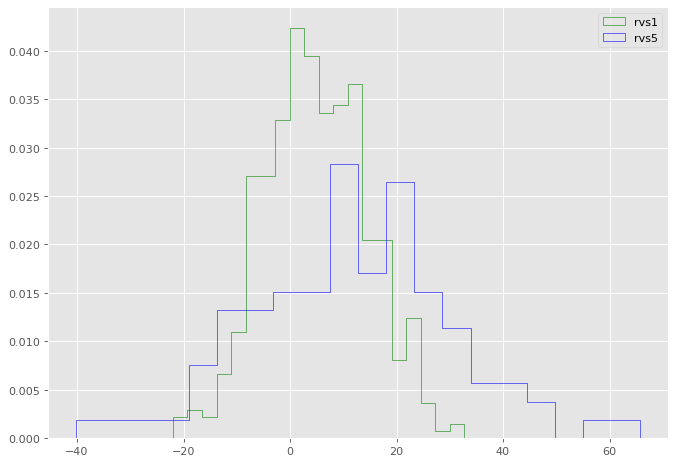

In [31]:
# Review Distributions of rvs1 and rvs5 in plot form
plt.figure(figsize=(10,7), dpi= 80)
plt.hist(rvs1, **kwargs, color='g', label='rvs1', histtype='step')
plt.hist(rvs5, **kwargs, color='b', label='rvs5', histtype='step')
plt.legend()
plt.show()

***
Again we call the <code>stats.ttest_ind</code> test using both the Student's t-test and Welch's t-test.<br>
We see that the p-value is lower using the Student's t-test compared to the Welch's t-test and t-statistic is significantly different.<br>

In [32]:
t_ss_equal, p_ss_equal = stats.ttest_ind(rvs1, rvs5)
t_ss_unequal, p_ss_unequal = stats.ttest_ind(rvs1, rvs5, equal_var=False)
print(f't-statistic using equal variances = {t_ss_equal}. t-statistic using unequal variances = {t_ss_unequal}')
print(f'p-value using equal variances = {p_ss_equal}. p-value using unequal variances = {p_ss_unequal}')

t-statistic using equal variances = -5.018138234612228. t-statistic using unequal variances = -3.2952656095336863
p-value using equal variances = 6.890913539793267e-07. p-value using unequal variances = 0.0013262831254101373


***
The <code>permutations</code> parameter in <code>stats.ttest_ind</code> reportedly yields more accurate results. When we specify a <code>permutations</code> value the p-value is based on an empirical bootstrap distribution of potential test statistics rather than a single estimate of variance.<br>
> To get a p-value, we randomly sample (without replacement) possible permutations of our variable of interest. The p-value is the proportion of samples that have a test statistic larger than that of our observed data.

In the below example we will specify 10000 permutations - i.e we will run the Student's t-test 10000 times to more accurately calculate the p-value.

In [33]:
t_ss_equal, p_ss_equal = stats.ttest_ind(rvs1, rvs5, permutations=10000, random_state=rng)

In [34]:
print(f't-statistic using permutations = {t_ss_equal}. p-value using permutations = {p_ss_equal}')

t-statistic using permutations = -5.018138234612228. p-value using permutations = 0.0


***
When we are dealing with normally distributed independent samples of equal variance we have seen that the Student's t-test is easy to run and interpret. When we have unequal variance we can rely on the Welch's t-test which is described as being "more robust". However, both tests (and particularly the Student's t-test) are sensitive to outliers in the sample data sets. If outliers are not removed we can expect to see deterioration of type I error rates.<br>
Let us create two new arrays rvs6 and rvs7 with significantly different means (rvs6 = 2, rvs7 = 6) and identical standard deviations.

In [35]:
rvs6 = stats.norm.rvs(loc=2, scale=5, size=60, random_state=rng)
rvs7 = stats.norm.rvs(loc=6, scale=5, size=60, random_state=rng)

Now we are going to add one outlier to the rvs6 array.

In [36]:
rvs6_outliers = np.append(rvs6, [100])

***
Plotting the distributions shows us that there is a significant difference however, due to the outlier in the rvs6_outlier array, the means are actually similar.

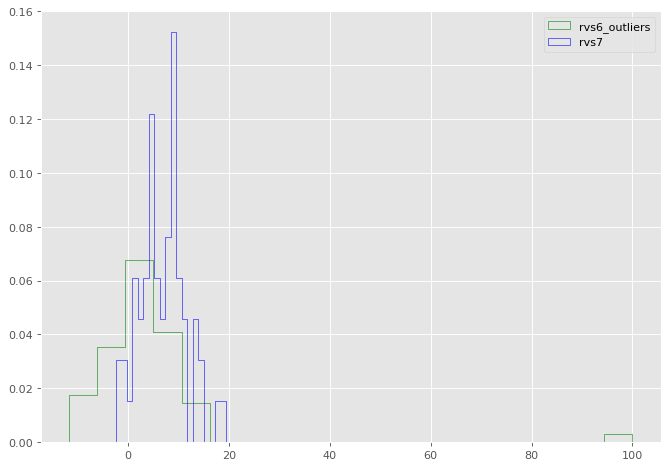

In [37]:
# Review Distributions of rvs1_outliers and rvs2 in plot form
kwargs = dict(bins=20, density=True, stacked=True)
plt.hist(rvs6_outliers, **kwargs, color='g', label='rvs6_outliers', histtype='step')
plt.hist(rvs7, **kwargs, color='b', label='rvs7', histtype='step')
plt.legend()
plt.show()

In [38]:
rvs6_outliers_mean, rvs6_outliers_std = np.mean(rvs6_outliers), np.std(rvs6_outliers)
rvs7_mean, rvs7_std = np.mean(rvs2), np.std(rvs2)

print(f'Mean of rvs6_outliers = {rvs6_outliers_mean}. Standard Deviation of rvs6_outliers = {rvs6_outliers_std}')
print(f'Mean of rvs7 = {rvs7_mean}. Standard Deviation of rvs7 = {rvs7_std}')

Mean of rvs6_outliers = 3.821837435713573. Standard Deviation of rvs6_outliers = 13.606943123371002
Mean of rvs7 = 5.024211696573093. Standard Deviation of rvs7 = 10.275936690719533


***
When we perform the t-tests using both Student's t-test and Welch's t-test we see that the p-value is > 0.05 indicating that we fail to reject the null hypothesis. Based on this, the samples have the same averages.

In [39]:
t_ss_equal, p_ss_equal = stats.ttest_ind(rvs6_outliers, rvs7)
t_ss_unequal, p_ss_unequal = stats.ttest_ind(rvs6_outliers, rvs7, equal_var=False)
print(f't-statistic using equal variances = {t_ss_equal}. t-statistic using unequal variances = {t_ss_unequal}')
print(f'p-value using equal variances = {p_ss_equal}. p-value using unequal variances = {p_ss_unequal}')

t-statistic using equal variances = -1.6117294913354396. t-statistic using unequal variances = -1.6225209375576874
p-value using equal variances = 0.1096699834559349. p-value using unequal variances = 0.10898463733272255


***
Fortunately, <code>scipy.stats.ttest_ind</code> provides the <code>trim</code> parameter that, when passed, will trim a percentage of outliers from the tails of the sample distributions.<br>
Performing the <code>scipy.stats.ttest_ind</code> and trimming just 2% of the tails of our previously created samples results in a significantly different t-statistic and p-value showing that there is indeed a difference in the means of the two.


In [40]:
stats.ttest_ind(rvs6_outliers, rvs7, trim=.02)

Ttest_indResult(statistic=-4.497999344905699, pvalue=1.648895451328309e-05)

***
### End of Notebook